# Import required libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import KFold
import copy as cp
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Cleaning

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

A few observation here:
1. There is no any null values
2. Id does not related to the classification process
3. Species is an object data type

In [ ]:
# Remove Id columns
iris_data = iris_data.drop(['Id'],axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Replace label of species with numbers
iris_data.Species = iris_data.Species.replace({'Iris-setosa':0,"Iris-versicolor":1,'Iris-virginica':2})
cleaned_iris = iris_data
cleaned_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Split the data into feature and label

In [ ]:
X = cleaned_iris.drop(['Species'],axis=1)
y = cleaned_iris['Species']
X = X.to_numpy()
y = y.to_numpy()

We obtain quite a balanced number of instances for each class

# Perform cross validation and evaluation

In [ ]:
# Define number of folds to be use
k=10
kfold = KFold(n_splits=k, random_state=42, shuffle=True)

multi_NB = MultinomialNB()

# Declare a list to store the required elements for confusion matrix
actual_classes = np.empty([0], dtype=int)
no_classes = len(np.unique(y))
predicted_classes = np.empty([0], dtype=int)
predicted_proba = np.empty([0, no_classes]) 

# Iterate through all the folds and predict the target classes and assign to the list respectively
for train_ndx, test_ndx in kfold.split(X):
  train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]
  actual_classes = np.append(actual_classes, test_y)
  multi_NB.fit(train_X, train_y)
  predicted_classes = np.append(predicted_classes, multi_NB.predict(test_X))
  try:
    predicted_proba = np.append(predicted_proba, multi_NB.predict_proba(test_X), axis=0)
  except:
    predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)


Plot Confusion matrix

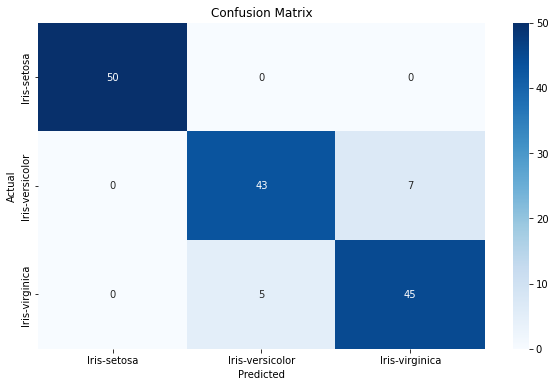

In [ ]:
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica']
matrix = confusion_matrix(actual_classes, predicted_classes)
    
plt.figure(figsize=(10,6))
sns.heatmap(matrix,xticklabels=labels, yticklabels=labels,  annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()

Generate classification report

In [ ]:
# print classification report
print('The classification report for SVM:')
print(classification_report(actual_classes, predicted_classes))

The classification report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.90      0.86      0.88        50
           2       0.87      0.90      0.88        50

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

